In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('taxis_zonas.csv')

In [3]:
print(data.head())

   Shape_Leng  Shape_Area  LocationID        Borough                     Zone  \
0    0.116357    0.000782           1            EWR           Newark Airport   
1    0.433470    0.004866           2         Queens              Jamaica Bay   
2    0.084341    0.000314           3          Bronx  Allerton/Pelham Gardens   
3    0.043567    0.000112           4      Manhattan            Alphabet City   
4    0.092146    0.000498           5  Staten Island            Arden Heights   

  service_zone  
0          EWR  
1    Boro Zone  
2    Boro Zone  
3  Yellow Zone  
4    Boro Zone  


In [4]:
#Calculo las descriptivas
print(data.describe())

       Shape_Leng  Shape_Area  LocationID
count  263.000000  263.000000  263.000000
mean     0.094269    0.000402  131.984791
std      0.054594    0.000482   76.073787
min      0.014306    0.000006    1.000000
25%      0.054722    0.000133   66.500000
50%      0.084341    0.000268  132.000000
75%      0.119488    0.000480  197.500000
max      0.433470    0.004866  263.000000


In [5]:
print(data.dtypes)

Shape_Leng      float64
Shape_Area      float64
LocationID        int64
Borough          object
Zone             object
service_zone     object
dtype: object


In [6]:
#Verifico los valores nulos
print(data.isnull().sum())

Shape_Leng      0
Shape_Area      0
LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64


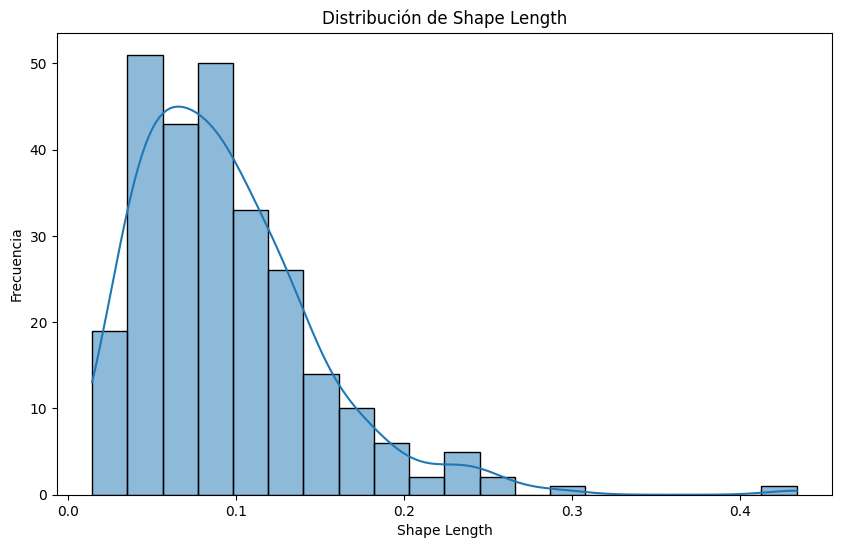

In [7]:
# Histograma de Shape Length
#En este grafico observo como se distribuye la longitud recorrida por los taxis.
plt.figure(figsize=(10, 6))
sns.histplot(data['Shape_Leng'], bins=20, kde=True)
plt.title('Distribución de Shape Length')
plt.xlabel('Shape Length')
plt.ylabel('Frecuencia')
plt.show()

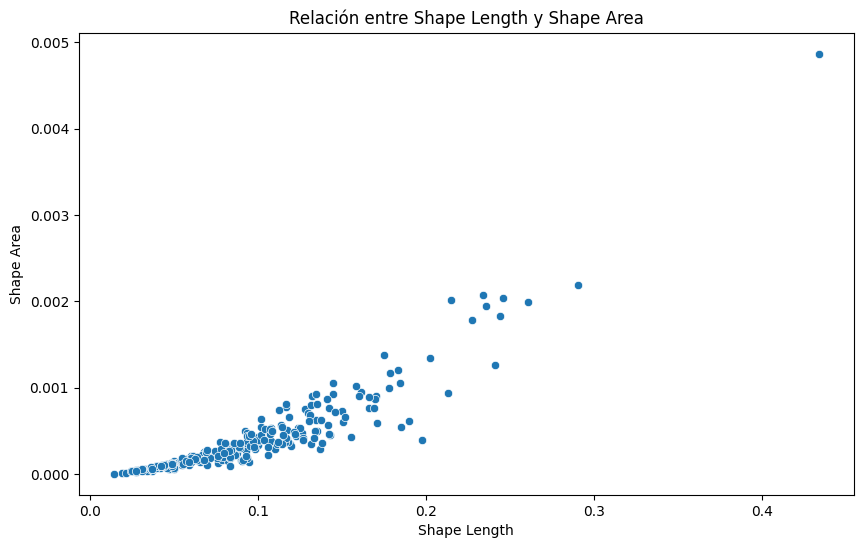

In [8]:
# Gráfico de dispersión entre Shape Length y Shape Area
#Este grafico muestra la relación entre la longitud y el area cubierta por los taxis.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shape_Leng', y='Shape_Area', data=data)
plt.title('Relación entre Shape Length y Shape Area')
plt.xlabel('Shape Length')
plt.ylabel('Shape Area')
plt.show()

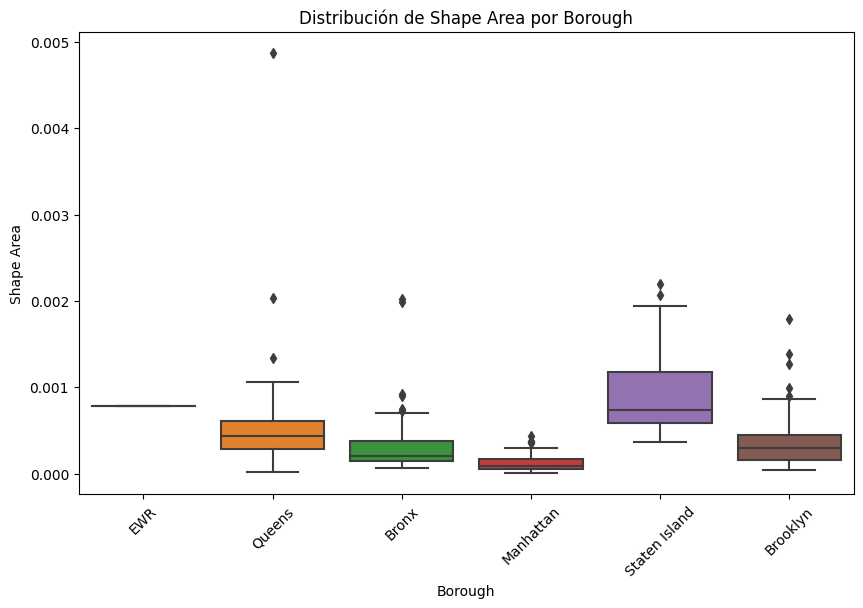

In [9]:
# Boxplot por Borough
#Este grafico muestra como se distribuye el area por Borough y los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Borough', y='Shape_Area', data=data)
plt.title('Distribución de Shape Area por Borough')
plt.xlabel('Borough')
plt.ylabel('Shape Area')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lic.Balzarelli\AppData\Local\Temp\ipykernel_7804\283959271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


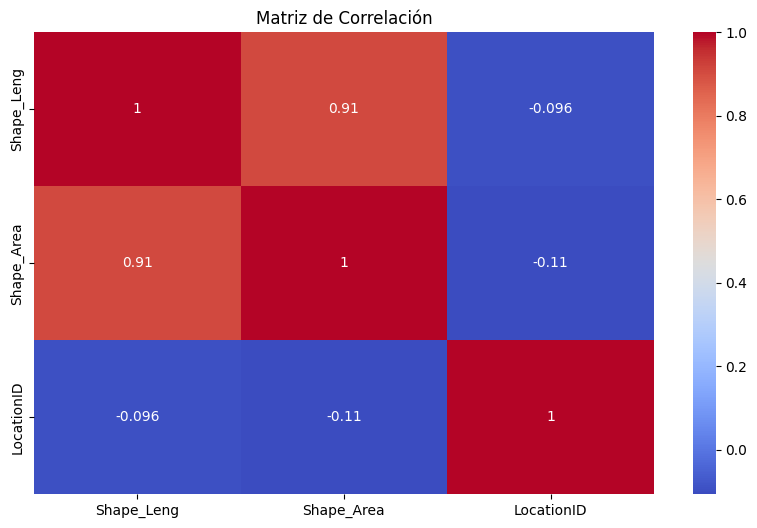

In [10]:
# Correlación entre Shape Lenght y Shape Area
#Esta matriz muestra la correlación entre el area y la longitud recorrida por los taxis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

C:\Users\Lic.Balzarelli\AppData\Local\Temp\ipykernel_7804\766147250.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby('service_zone').sum()


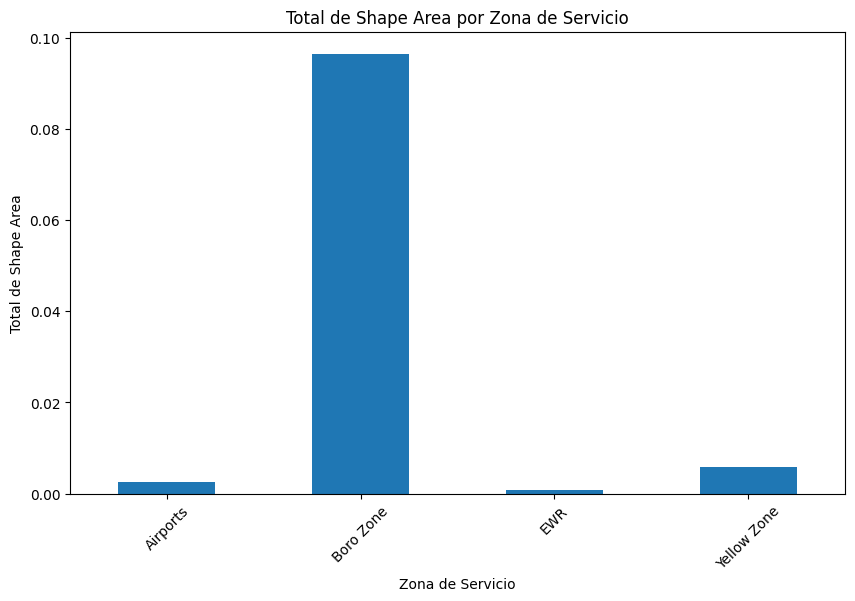

In [11]:
# Agrupación y suma por zona de servicio
#En este gráfico podemos observar el total del area por zona de servicio. Se observa claramente que la zona donde los taxis cubren mayor area es en la zona de los barrios.
data_grouped = data.groupby('service_zone').sum()
plt.figure(figsize=(10, 6))
data_grouped['Shape_Area'].plot(kind='bar')
plt.title('Total de Shape Area por Zona de Servicio')
plt.xlabel('Zona de Servicio')
plt.ylabel('Total de Shape Area')
plt.xticks(rotation=45)
plt.show()